# Can Yelp Reviews and Census Data Help Predict NYC Inspection Scores?

## I. Introduction

The New York City (NYC) Health Department conducts unannounced inspections of restaurants once a year. Inspectors check for compliance in food handling, food temperature, personal hygiene and vermin control and assign a score to the restaurant based on the number and seriousness of any violations. The score is translated to a letter grade (A, B or C) with A being the best grade. A certificate with the letter-grade needs to be posted on a door or window and must be visible from the outside.

More than 20 thousand inspections are conducted each year at random. Although various health violations have declined since the grading system was implemented in 2010, the current system creates significant administrative burden and cost given the number of inspections involved. This study analyzes whether there is an association between restaurant review data from Yelp, demographics data from the NYC census, and the inspection results for restaurants inspected by the NYC Health Department by exploring two questions. First, can the Yelp and demographics data be used to predict the score received by a restaurant as a result of an inspection? Second, can the NYC inspection results and demographics data be used to predict whether a restaurant has a favorable or unfavorable Yelp review?

The results of the first question's analysis could have significant implications for city health departments because, if an association is found between Yelp and demographics data and NYC inspection scores, cities could use the findings to build a more targeted sample of "high-risk" restaurants from which to randomly select for inspections instead of sampling randomly from the entire population.
Even more broadly, finding an association between these publicly available data sets and city assessment results may encourage other municipalities that conduct assessments (e.g., fair housing and tax reporting) to explore whether similar models may be used in their domain to more effectively channel funds and personnel.

The results of analyzing the second question could have significant commercial implications for restaurants because if, for example, an association is found between the NYC inspections results and Yelp reviews, restaurants may pay more notice to the kinds of business decisions that ultimately get reflected through health code violations. Since we will also be looking at specific violation codes, the results may teach us what types of violations are reflective of restaurant characteristics consumers tend to care most about pertaining to health standards.


## II. Data

The basic data consists of restaurant inspection results for inspections taking place in the year 2016, including type, action, violation code and descriptions (hereinafter referred to as “NYC inspections”). This data is hosted on Kaggle and provided by NYC’s Department of Health and Mental Hygiene (DOHMH). To explore whether basic demographic information of the restaurant’s location showed any association with an inspection score, we obtained demographic statistics by zip code provided by NYC's Department of Youth and Community Development (DYCD). Both the inspections and demographics data are made available by NYC as part of their "Open Data" initiative. One difficulty with the demographic statistics is that the statitics provided for several zip codes are based on a small number of survey responses. Moreover, surveys aren't always perfect at aggregating accurate samples. Unfortunately, there was no way to mitigate this issue, but it is raised here as a word of caution when interpreting any findings associated with predictors sourced from this dataset. 

The Yelp business information for restaurants represented in the NYC inspections dataset was obtained using Yelp’s Fusion API. Although NYC assigns a unique City-wide Agency Management Information System (CAMIS) number to each restaurant, this number did not provide a link that could identify a corresponding business profile on Yelp. Therefore, we queried the Yelp API for the restaurant's profile by searching the name and address for the restaurant provided in the NYC inspections dataset. Then, we conducted several checks to ensure the returned result was a matching profile, including ensuring the zip codes matched and manually checking restaurants where the Yelp and NYC Inspections restaurant names or addresses had a Levenshtein distance greater than zero. See Ingersoll (2013) for a  discussion on the merits of comparing the similarity of texts using this metric. One cautionary note with this dataset is that the Yelp profile that we can obtain through the API is a snapshot in time, and based on when we gathered the data, it provides us a snapshot in November 2017. A lot could have happened with a restaurant in the time between when the inspections were done (2016) and when we obtained the restaurant's profile on Yelp. A more ideal dataset would have provided us with some sense of how the restaurant's profile has evolved or, at least, what it was near the time of the inspection.

## III. Methodology Overview

In order to test our hypotheses, we will use a variety of linear regression models. Here, we provide a brief overview of the theory behind these methods, and in subsequent sections we will address the assumptions upon which this theory is based in order to ensure that they are viable tools to explore our inquiry.

### Ordinary Least Squares (OLS) Regression

The first linear regression method we will use to test our hypotheses is ordinary least squares regression, where the equation we’re trying to solve is of the form

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p + \epsilon$$

where $p$ represents the number of predictors in the model, $\beta_i$ represents the estimated change in the expected value of the response variable ($Y$) for a 1-unit increase in the *i*th predictor ($X_i$), and $\epsilon$ is the variation of the response not accounted for by the model, i.e., the error or residual.

OLS regression will allow us to test our hypothesis primarily by yielding two vital pieces of information:

- The coefficients $\beta$ will provide us with the expected marginal changes in the expected value of NYC Inspections scores $Y$ for each corresponding set of values of the explanatory variables we choose ($X$).
- Several summary statistics measuring the overall ability of the model to explain the variation in NYC Inspections scores (about the mean).

However, for the insights produced by OLS regression to be robust, we must ensure that the four main assumptions of OLS regression are upheld:

**Independence:** Observations need to be independent.

**Linearity:** It is a requirement to have linear relationships between the response and the explanatory variables.

**Normality:** Residuals are assumed to be normally distributed.

**Constant variance:** The variance of the residuals is assumed to be constant.

Therefore, before creating any statistical models, exploratory data analysis is performed to provide relevant information about the distribution of the independent variable (`inspection score`) and selected explanatory factors included in the data. 

### Cross Validation

Since our research inquiries relate to prediction, we use cross validation to assess the accuracy and precision of our model. In all of the regression models we build in subsequent sections, we use 50% of the data to estimate ("train") our model, i.e., the training set and reserve 50% of the data to validate ("test") the predictive capability of our model, i.e., the test set. Therefore, any model performance statistics provided (whether $R^2$, AUC or classification accuracies) are those calculated from predictions made on the test dataset. By validating our models on data separate from that used to train/fit our models, we can effectively mimic how our models would perform on out-of-sample data, i.e., restaurant inspection results and Yelp reviews encountered in the future. Since we use the $R^2$ metric to compare several models, cross-validation also allows us to mitigate the bias inherent in using $R^2$ that favors models with a greater number of predictors. Increasing the number of predictors will always provide a higher $R^2$ on the training set, but if it results in overfitting, this will be "punished" once we validate the model on the test set.


## IV. Data Investigation

The main objective of this analysis is to determine whether any transformations should be applied to the response and predictors to ensure that the relevant OLS assumptions hold. Here we will explore several aspects of the data and comment on the soundness of the assumptions we are implicitly making about our data by conducting OLS regression.

First, we analyze the response variable (inspection scores), to determine whether it is normally distributed. If our response variable is not normally distributed, we may still have a linear relationship between the response and the explanatory variables, but it becomes significantly more likely that we will violate one of the other previously mentioned OLS assumptions down the road. Therefore, we first address the normality of the response variable.

In the charts below, we notice that the distribution of the untransformed inspection score is positively skewed with a significant proportion of observations in the 10 to 15 score range. Logarithmic and square-root transformations are considered to make the response more normally distributed. We note that both transformations are reasonably effective at making the distribution more symmetrical, but do not correct the modality in the centre of the distribution.

Further investigation into the restaurant inspection process, suggests that this could be a systematic bias in the inspection scores influenced by the design of the grading system. In particular, we note that each score is translated to a letter grade (A for scores between 0 and 13, B for scores between 14 and 27 and C for scores above 27). This creates multi-modality in the response which violates normality requirement of the OLS model. It also appears that there is a tendency to assign scores that is an A grade, but very close to being a B grade (i.e. in the 10 to 13 score range). It is postulated that this could be a practice inspectors follow to motivate restaurant owners to take remedial action for problem areas identified during the inspection.

A number of different strategies are considered in the report to deal with the non-normality of the response variable. However, this does not include directly addressing the implicit bias that is potentially included in the scores as mentioned in the previous paragraph. 

In [1]:
#
# Import libraries and set global parameters
#

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import distance
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from pandas.tools.plotting import table
from statsmodels.api import OLS
from statsmodels.discrete.discrete_model import MNLogit
from scipy import stats
from tqdm import tqdm

from IPython.display import display, HTML

pd.options.mode.chained_assignment = None
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

sns.set_context("talk")
sns.set_style("white")
#sns.despine()

%matplotlib inline

In [2]:
# Paths
PATH_YELP_DATA = 'data/yelp_data.csv'
PATH_INSPECTIONS = 'data/nyc_restaurant_inspection_data.csv'
PATH_DEMOGRAPHICS = 'data/demographics_zipcode.csv'

# Global params
nsims = 500

# Import data
data = pd.read_csv('data/model_data.csv')

# Subset data (inspection year)
data = data.loc[data['inspection_year'] == 2016, :]

# Response transformations
data['sqrt_score'] = np.sqrt(data['score'])

# Predictor transformations
data['sqrt_score_avg'] = np.sqrt(data['score_avg'])
data['sqrt_score_prev'] = np.sqrt(data['score_prev'])
data['log_review_count'] = np.log(data['review_count'])

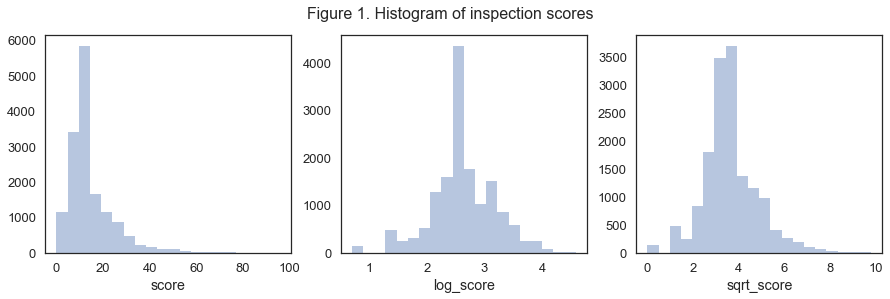

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax = ax.ravel()

response_vars =['score', 'log_score', 'sqrt_score']
for c in response_vars:
    i = response_vars.index(c)
    sns.distplot(data[c], bins=20, kde=False, ax=ax[i]);

plt.suptitle("Figure 1. Histogram of inspection scores", fontsize=16)
plt.savefig("output/response_distribution.png", bbox_inches='tight')

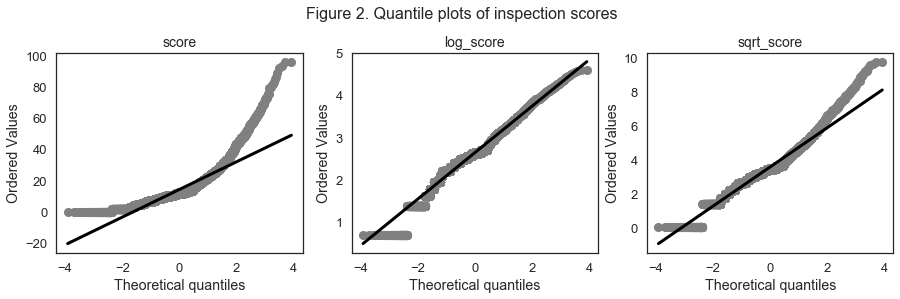

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax = ax.ravel()

response_vars =['score', 'log_score', 'sqrt_score']
for c in response_vars:
    i = response_vars.index(c)
    stats.probplot(data[c], plot=ax[i]);
    ax[i].get_lines()[0].set_markerfacecolor('grey')
    ax[i].get_lines()[1].set_color('black')
    ax[i].get_lines()[1].set_linewidth(3)
    ax[i].set_title(c, fontsize=14);
    
plt.suptitle("Figure 2. Quantile plots of inspection scores", fontsize=16);
plt.subplots_adjust(top=0.82);
plt.show()

We note from the histogram and quantile plots above, that the log transformation is likely the best standard transformation option availble, although the normality assumption is still clearly violated. A significant number of outliers is observed relative to the large concentration of observations around the median of the distribution.

A number of scatter plots, showing associations between the log score and some explanatory variables are shown below. In general, we note very weak linear relationships between the response and most of the explanatory variables considered. We do observe a slight decreasing relationship between score and rating, suggesting that restuarants with higher Yelp ratings are less likely to receive a high (poor) inspection score. It is also noted that some of the factors based on historic inspection scores have a relationship with the inspection score. In particular, restaurants with a higher historic average score are more likely to have a high score in future. 

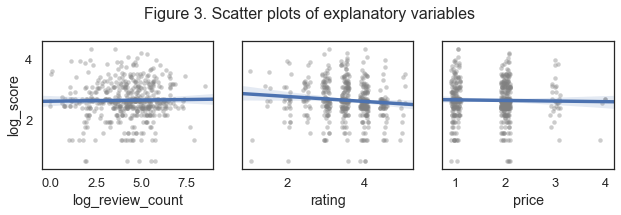

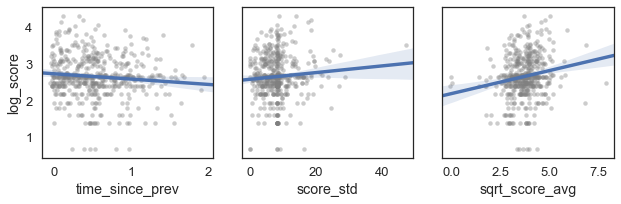

In [5]:
# Yelp ratings and previous inspection scores

df = data.sample(500, random_state=87)
x_vars = ['log_review_count', 'rating', 'price']
g = sns.PairGrid(df, y_vars=["log_score"], x_vars=x_vars[:3], size=3, despine=False)
g.map(sns.regplot, x_jitter=.1, scatter_kws={'s':20,'alpha':0.4, 'color':'grey'});

plt.suptitle("Figure 3. Scatter plots of explanatory variables", fontsize=16);
plt.subplots_adjust(top=0.82);

plt.savefig("output/sqrt_score_scatterplots_yelp.png", bbox_inches='tight')

x_vars = ['time_since_prev', 'score_std', 'sqrt_score_avg']
g = sns.PairGrid(df, y_vars=["log_score"], x_vars=x_vars[:3], size=3, despine=False)
g.map(sns.regplot, x_jitter=.1, scatter_kws={'s':20,'alpha':0.4, 'color':'grey'});

plt.savefig("output/sqrt_score_scatterplots_ratings.png", bbox_inches='tight')

One additional implicit assumption in interpreting the regression equation is that the predictor variables are not strongly interrelated, i.e., collinear. When predictors do suffer from multi-collinearity, we lose the usual interpretation of the regression coefficient as the change in the response when the corresponding predictor variable is increased by one unit and all other predictors are held constant.

Pair-wise scatter plots between the key quantitative explanatory variables are shown below to highlight potential issues with multi-collinearity between the predictors. We note that, except for the relationship between the average historic score for a restaurant (`sqrt_score_avg`) and its most recent score (`sqrt_score_prev`) the predictors do not appear to be strongly correlated with each other, meaning that collinearity is not a major concern for the variables considered.

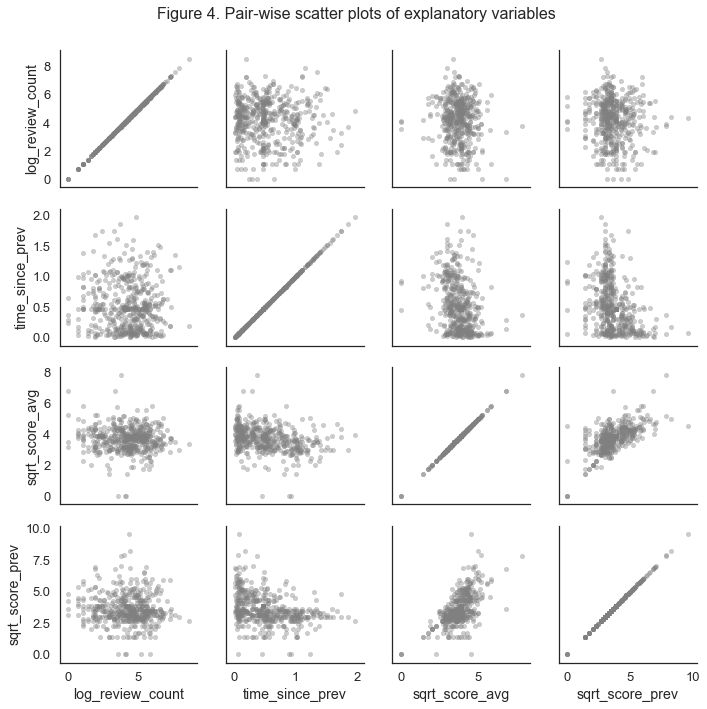

In [6]:
# Scatterplots

x_vars = ['log_review_count', 'time_since_prev', 'sqrt_score_avg', 'sqrt_score_prev']
g = sns.PairGrid(df[x_vars], size=2.5)
g.map(plt.scatter, s=20, alpha=0.4, color='grey');

plt.suptitle("Figure 4. Pair-wise scatter plots of explanatory variables", fontsize=16);
plt.subplots_adjust(top=0.92);

plt.savefig("output/xy_scatterplots.png", bbox_inches='tight')

## V. Ordinary Least Squares (OLS) Regression

### Yelp review variables

In this section of the report, a number of different linear regression models are evaluated. We start by creating some simple models with a small number of predictors and then systematically expand the number of predictors. For each model the relevant OLS assumptions are reviewed with appropriate interpretation of the model output to answer questions posed in the project statement.

The first model considered includes only three predictors that were obtained from Yelp:
* `log_review_count`: Number of Yelp reviews for particular restaurant
* `rating`: Yelp rating for restaurant
* `price`: Price category based on Yelp profile

In [7]:
# Selected predictors + response
model_cols = ['log_review_count', 'rating', 'price', 'log_score']

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

# Fit model
mod = OLS(y_train, X_train)
res = mod.fit()

# Print summary statistics
names = ['const'] + list(train_df.columns[:-1])
appdx_1_mod1summary = res.summary(xname=names)

After fitting an OLS model with these three predictors (summary located in Table 1 of the Appendix), we note that the `log_review_count` and `rating` variables are statistically significant with $p$-values close to 0. Given the concerns with the normality of the response we note that the standard errors of the parameter estimates and therefore $p$-values provided in the output should be interpreted with care. It is also noted that the $R^2$ of the model is extremely low (0.5%), suggesting that these predictors are not effective at explaining the variation in the response. However, the $F$-statistic of the model is large enough to suggest that the overall model's interpretation is statistically significant, even though it may not account for a large proportion of the variation of the response about its mean.

Next, we plot several depictions of the model's residuals.

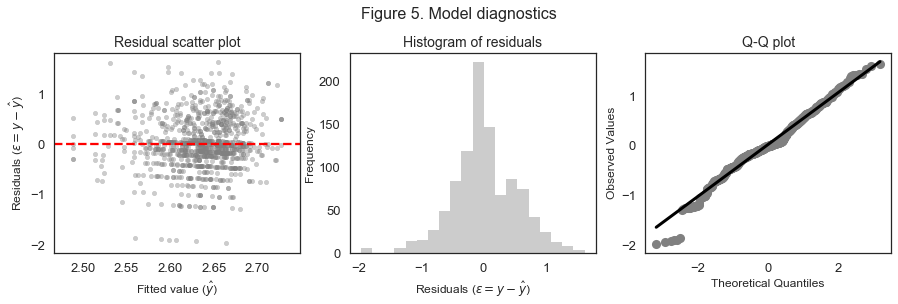

In [8]:
# Calculate errors
pred = res.fittedvalues
errors = y_train - pred

sample = np.random.randint(len(pred), size=1000)
pred = pred[sample]
errors = errors[sample]

# Residual plots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(pred, errors, color='grey', alpha=0.4, s=20)
ax[0].axhline(y=0, color='red', label='zero error', linestyle='dashed')
ax[0].set_title('Residual scatter plot', fontsize=14)
ax[0].set_xlabel('Fitted value ($\hat{y}$)', fontsize=12)
ax[0].set_ylabel('Residuals ($\epsilon = y - \hat{y}$)', fontsize=12);

ax[1].hist(errors, color='grey', bins=20, alpha=0.4);
ax[1].set_title('Histogram of residuals', fontsize=14)
ax[1].set_xlabel('Residuals ($\epsilon = y - \hat{y}$)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12);

stats.probplot(errors, plot=ax[2]);
ax[2].get_lines()[0].set_markerfacecolor('grey')
ax[2].get_lines()[1].set_color('black')
ax[2].get_lines()[1].set_linewidth(3)
ax[2].set_title('Q-Q plot', fontsize=14);
ax[2].set_xlabel('Theoretical Quantiles', fontsize=12)
ax[2].set_ylabel('Observed Values', fontsize=12);

plt.suptitle("Figure 5. Model diagnostics", fontsize=16);
plt.subplots_adjust(top=0.82);

plt.savefig("output/modelA_diagnostics.png", bbox_inches='tight')

With these data visualizations at our disposal, we revisit the four main assumptions of OLS regression and discuss their merit in our analysis:

**Independence of observations:** This assumption is difficult to evaluate using the plots above. We note that the dataset used to create the model can include multiple inspections in the same year for a particular restaurant. We would also expect that certain inspectors might operate in specific areas, creating a dependence between different restaurants in the same area. Both these factors would impact the independence of the observations. 

**Linearity between response and predictors:** From the scatter plots produced in the previous section we do not observe any non-linear effects between the explanatory variables and the response. In general the association between the response and the explanatory factors is very weak.

**Normality of residuals:** From the historgram and quantile plots above we note that the normality assumption is not satisfied. The distribution of the residual is likely driven by the distribution observed for the inspection score.

**Residual constant variance:** Based on the residual plot this appears to hold reasonably well. The clusters of residuals observed in the residual plot, is likely caused by the discrete nature of the response taking on a relatively small number of integer values.

### Inspection score variables

The next model considers a number of variables based on the restaurant inspection data:

* `sqrt_score_avg`: Square-root of average historic inspection score for restaurant
* `time_since_prev`: Time (fraction of year) since previous inspection
* `restaurant_name_chain`: Flag indicating if the restaurant is likely part of a chain

Although the definition of what constitutes a restaurant “chain” isn’t well defined and varies across many contexts, as a proxy we classified any restaurant whose name was encountered more than 50 times in the NYC Inspections dataset as being a chain restaurant.

In [9]:
# Selected predictors + response
model_cols = ['sqrt_score_avg', 'time_since_prev', 'restaurant_name_chain', 'log_score']

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

# Fit model
mod = OLS(y_train, X_train)
res = mod.fit()

# Print summary statistics
names = ['const'] + list(train_df.columns[:-1])

appdx_2_mod2summary = res.summary(xname=names)

The model output (Table 2 of the appendix) shows that all three predictors are significant at a 0.2% significance level. The coefficient estimate for historic inspection scores (`sqrt_score_avg`) suggests that inspection scores are positively correlated with the response. It makes sense that restaurants will likely receive inspection scores similar to what they have received in the past. The time since previous inspection (`time_since_prev`) variable has a negative parameter estimate, meaning that restaurants that have not been inspected for a longer period are likely to receive a lower (better) score. This would make sense if inspectors visit problematic restaurants more frequently. Lastly we note that restaurants that are part of a chain are expected to have lower (better) scores. This could be explained by chains/franchises paying more attention to compliance given potential reputational risk and having access to greater resources. Again we note that the standard errors of the model should be interpreted with caution given the concerns with the model assumptions. The $F$-statistic of the model (`65.45`) is also significantly larger than it was for the model with Yelp variables (`12.21`).

The $R^2$ is higher compared to the model based on the Yelp variables, suggesting that these variables explain more variation in the response. Here we plot the same depictions of the model's residuals that we did for the previous model on Yelp variables.

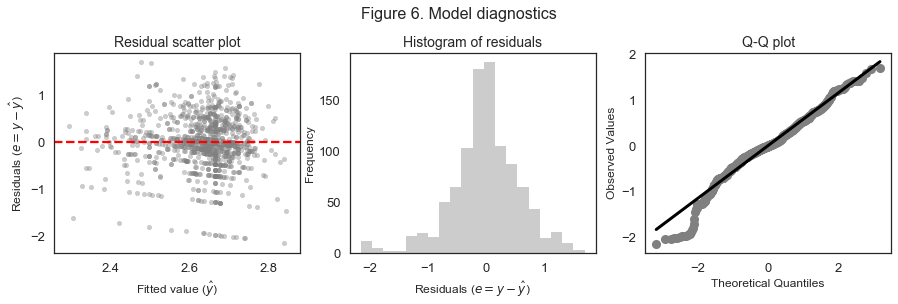

In [10]:
# Calculate errors
pred = res.fittedvalues
errors = y_train - pred

sample = np.random.randint(len(pred), size=1000)
pred = pred[sample]
errors = errors[sample]

# Residual plots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(pred, errors, color='grey', alpha=0.4, s=20)
ax[0].axhline(y=0, color='red', label='zero error', linestyle='dashed')
ax[0].set_title('Residual scatter plot', fontsize=14)
ax[0].set_xlabel('Fitted value ($\hat{y}$)', fontsize=12)
ax[0].set_ylabel('Residuals ($e = y - \hat{y}$)', fontsize=12);

ax[1].hist(errors, color='grey', bins=20, alpha=0.4);
ax[1].set_title('Histogram of residuals', fontsize=14)
ax[1].set_xlabel('Residuals ($e = y - \hat{y}$)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12);

stats.probplot(errors, plot=ax[2]);
ax[2].get_lines()[0].set_markerfacecolor('grey')
ax[2].get_lines()[1].set_color('black')
ax[2].get_lines()[1].set_linewidth(3)
ax[2].set_title('Q-Q plot', fontsize=14);
ax[2].set_xlabel('Theoretical Quantiles', fontsize=12)
ax[2].set_ylabel('Observed Values', fontsize=12);

plt.suptitle("Figure 6. Model diagnostics", fontsize=16);
plt.subplots_adjust(top=0.82);

plt.savefig("output/modelB_diagnostics.png", bbox_inches='tight')

The observations from the model diagnostics are largely consistent with the model from the previous section. The residuals are more normally distributed, although we still observe deviations in the tails of the distribution, which is really distorted by the high density in the center of the distribution. 

### Restaurant category variables

The next model (Table 3 of the appendix) includes the category of each restaurant in addition to the Yelp review and inspection variables considered in the previous sections. We are interested in determining whether there is a relationship between restaurant category (e.g. Indian, Mexican, etc.) and inspection score.

In [11]:
# Predictors
model_cols = ['log_review_count', 'rating', 'price', 
              'sqrt_score_avg', 'time_since_prev', 'restaurant_name_chain']

cat_cols = [c for c in data.columns if "cat_" in c]
cat_cols.sort()
for c in cat_cols:
    model_cols.append(c)
        
# Response     
model_cols.append('log_score')

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

# Fit model
mod = OLS(y_train, X_train)
res = mod.fit()

# Print summary statistics
names = ['const'] + list(train_df.columns[:-1])
appdx_3_mod3summary = res.summary(xname=names)

Only a small number of the restaurant category indicators appear to be significant at the 5% significance level, which includes Chinese (`cat_chinese`), Deli's (`cat_delis`), Indian/Pakistani cuisine (`cat_indpak`), Latin (`cat_latin`), Mexican (`cat_mexican`) and New American (`cat_newamerican`). All of these categories appear to have a higher (worse) average inspection score compared to the average across all categories.


The $F$-statistic of the model (`6.4`) is lower compared to the previous two models considered. This makes sense given we just added a large number of predictors, many of which were statistically insignificant. We have increased the model's degrees of freedom without accounting for a commensurate additional amount of variation.

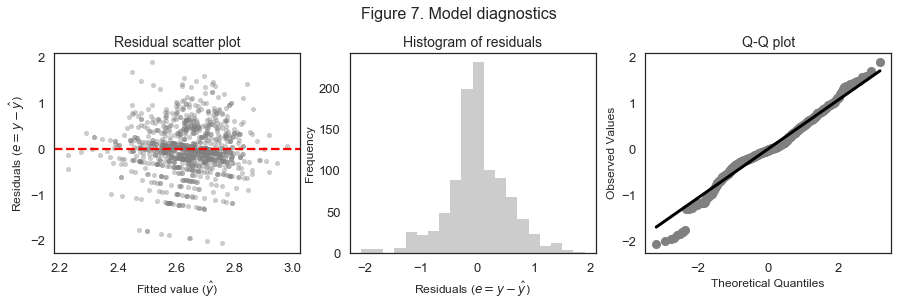

In [12]:
# Calculate errors
pred = res.fittedvalues
errors = y_train - pred

sample = np.random.randint(len(pred), size=1000)
pred = pred[sample]
errors = errors[sample]

# Residual plots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(pred, errors, color='grey', alpha=0.4, s=20)
ax[0].axhline(y=0, color='red', label='zero error', linestyle='dashed')
ax[0].set_title('Residual scatter plot', fontsize=14)
ax[0].set_xlabel('Fitted value ($\hat{y}$)', fontsize=12)
ax[0].set_ylabel('Residuals ($e = y - \hat{y}$)', fontsize=12);

ax[1].hist(errors, color='grey', bins=20, alpha=0.4);
ax[1].set_title('Histogram of residuals', fontsize=14)
ax[1].set_xlabel('Residuals ($e = y - \hat{y}$)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12);

stats.probplot(errors, plot=ax[2]);
ax[2].get_lines()[0].set_markerfacecolor('grey')
ax[2].get_lines()[1].set_color('black')
ax[2].get_lines()[1].set_linewidth(3)
ax[2].set_title('Q-Q plot', fontsize=14);
ax[2].set_xlabel('Theoretical Quantiles', fontsize=12)
ax[2].set_ylabel('Observed Values', fontsize=12);

plt.suptitle("Figure 7. Model diagnostics", fontsize=16);
plt.subplots_adjust(top=0.82);

plt.savefig("output/modelC_diagnostics.png", bbox_inches='tight')

The normality of residuals assumption is still a concern, although the distribution does appear slightly more normal compared to the previous models. The systematic clustering of residuals in the residual plot has also reduced slightly, due to the larger number of predictors included in the model.

We have just fit several OLS models on varying subsets of predictors. Although they have given us an idea on the amount of variation in NYC inspection scores that can be explained with the available data, they did not directly aid us in determining which predictors to keep in the model. With more than 50 predictors in the latest OLS model, we need a way to determine whether all or only a subset of the predictors actually provide information useful for predicting NYC inspections results. Including too many predictors can dampen our model's predictive utility by introducing too much "noise" or collinearity, i.e., multiple predictors effectively relaying the same information. We will utilize another regression method - *lasso* regression - to help us select which predictors to keep.

### Feature selection with Lasso regression

Given the concerns with the distribution of the residuals and therefore also with the confidence intervals of the parameter estimates, the next section determines empirical confidence intervals for the model parameters using a resampling approach. This involves fitting a large number of regression models based on resampled datasets, created by sampling from the original dataset with replacement. A lasso regularized linear regression model, that includes a penalty factor in the loss function based on the sum of the absolute value of the coefficients included in the model, is fit at each step. The lasso regression model will often shrink insignificant coefficients to zero, providing a more parsimonious model and a variable selection tool. By repeating this process many times and recording the model coefficients at each step, an empirical distribution of each of the model coefficients is obtained. With this distribution, we can build 95% confidence interval by obtaining the 2.5% and 97.5% percentiles. Then, we can deem a variable statistically significant (i.e., significantly different from 0) if this confidence interval does not include 0.

In [13]:
#
# Data prep for Lasso
#

# List of standard predictors in dataset
first_index = data.columns.get_loc("review_count")
last_index = data.columns.get_loc("first_inspection")
model_cols = list(data.columns[first_index: last_index + 1])

# Exclude violation vars
model_cols = [c for c in model_cols if "violation" not in c]

# Add transformed predictors
transformed_vars = ['log_review_count', 'sqrt_score_avg', 'sqrt_score_prev']
for c in transformed_vars:
    model_cols.append(c)
    
# Drop untransformed / collinear predictors
exclude_vars = ['review_count', 'score_avg', 'score_prev']
for c in exclude_vars:
    model_cols.remove(c)

# Response
model_cols.append('log_score')

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

# Scale predictors
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

In [14]:
#
# Fit initial Lasso model
#

# Fit model
mod = LassoCV(cv=5, max_iter=10000)
mod.fit(X_train, y_train)

# Non-zero coefficients
coefficients = pd.DataFrame(mod.coef_, columns=["coef"], index=model_cols[:-1])

In [15]:
#
# Fit multiple Lasso models with bootstrapping to create empirical confidence interval for parameters
#

n, p = X_train.shape
coef = np.zeros((nsims, p))

for i in range(nsims):
    
    sample = np.random.randint(0, n, n)
    X_train_boot = X_train[sample]
    y_train_boot = y_train[sample]
    
    # Fit model
    mod = LassoCV(cv=5, max_iter=100000)
    mod.fit(X_train_boot, y_train_boot)
    
    # Get coefficients
    coef[i,:] = mod.coef_

In [16]:
alpha = 0.025
coef_boot = pd.DataFrame(coef)

# Get empirical lower and upper bounds
LB = coef_boot.quantile(alpha)
UB = coef_boot.quantile(1-alpha)
C = np.logical_and(LB <= np.zeros(p), np.zeros(p) <= UB)

# Get mean estimate
coef_mean = coef_boot.mean().to_frame()
coef_mean['LB'] = LB
coef_mean['UB'] = UB

coef_mean['name'] = model_cols[:-1]
coef_mean = coef_mean.loc[np.logical_not(C),:]

# Format
coef_mean.columns = ['coef', 'LB', 'UB', 'name']
coef_mean.index = coef_mean['name']
coef_mean.drop('name', axis=1, inplace=True)
print(coef_mean.round(3))

                        coef     LB     UB
name                                      
rating                -0.028 -0.044 -0.014
cat_latin              0.015  0.002  0.028
cat_mexican            0.012  0.000  0.023
cat_indpak             0.014  0.003  0.027
cat_newamerican        0.014  0.002  0.025
cat_delis              0.014  0.002  0.026
cat_korean             0.014  0.004  0.025
restaurant_name_chain -0.050 -0.069 -0.031
score_std             -0.031 -0.058 -0.009
time_since_prev       -0.014 -0.027 -0.002
first_inspection      -0.028 -0.043 -0.012
sqrt_score_avg         0.072  0.040  0.100
sqrt_score_prev       -0.047 -0.066 -0.028


The table above provides the mean coefficient values and the bounds for a 95% confidence interval for all the variables in the model that appear to be significantly different from zero based on the constructed confidence intervals. The confidence intervals were constructed by running `500` iterations of the resampling approach described above. 

We note that five restaurant category variables are deemed statistically significant, four of which (Latin, Indian/Pakistani, New American and Deli's) are consistent with those identified as statistically significant at the 5% level in the OLS model in the previous section.

The histogram and quantile plots below describe the distribution for each of the significant variables identified. Based on the histogram plots most of the variables appear to be normally distributed. However, inspection of the quantile plots shows that the parameter distributions suffer from the same skew observed in the response variable. It is therefore appropriate to use the resampled confidence intervals to evaluate the significance of the paramters, rather than assuming normality.

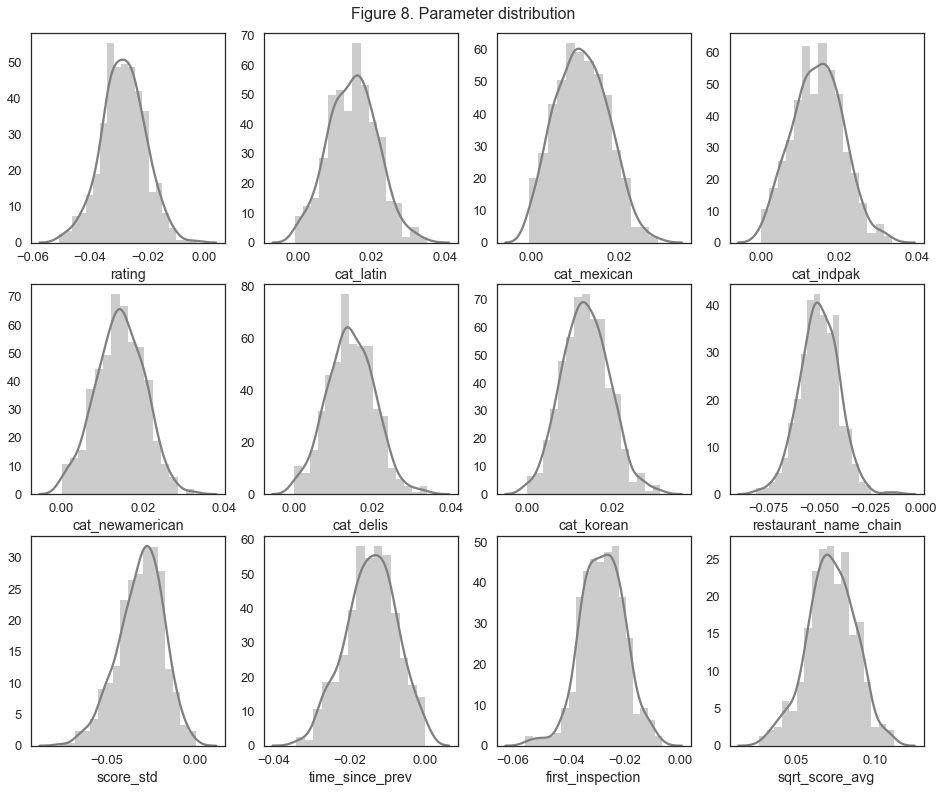

In [17]:
# Plot parameter distributions for significant parameters to assess normality

fig, ax = plt.subplots(3, 4, figsize=(16, 12))
ax = ax.ravel()

cols = list(coef_mean.index)
for c in cols[:12]:
    idx = model_cols.index(c)
    coefs = coef_boot.loc[:,idx]
    sns.distplot(coefs, color='grey', ax = ax[cols.index(c)])
    ax[cols.index(c)].set_xlabel(c);
    
plt.suptitle("Figure 8. Parameter distribution", fontsize=16);
plt.subplots_adjust(top=0.95);
    
plt.savefig("output/parameter_distributions_hist.png", bbox_inches='tight')

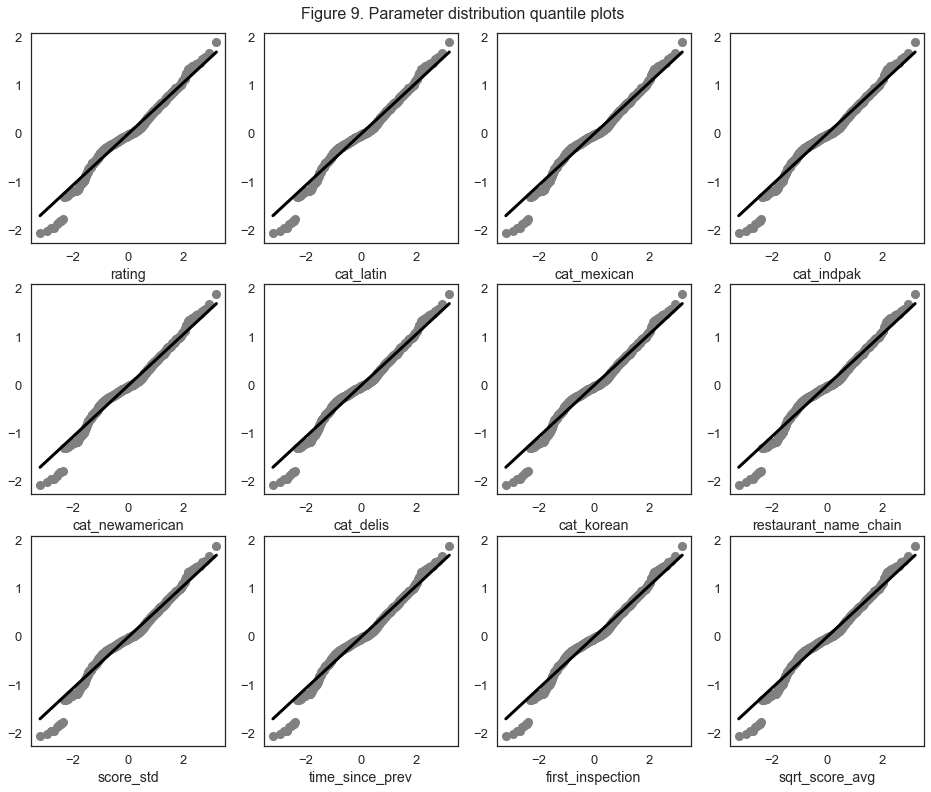

In [18]:
# Plot quantile plots for significant parameters to assess normality

fig, ax = plt.subplots(3, 4, figsize=(16, 12))
ax = ax.ravel()

cols = list(coef_mean.index)
for c in cols[:12]:
    idx = model_cols.index(c)
    coefs = coef_boot.loc[:,idx]
    i = cols.index(c)
    stats.probplot(errors, plot=ax[i]);
    ax[i].get_lines()[0].set_markerfacecolor('grey')
    ax[i].get_lines()[1].set_color('black')
    ax[i].get_lines()[1].set_linewidth(3)
    ax[i].set_title('')
    ax[i].set_ylabel('')
    ax[i].set_xlabel(c);
    
plt.suptitle("Figure 9. Parameter distribution quantile plots", fontsize=16);
plt.subplots_adjust(top=0.95);
    
plt.savefig("output/parameter_distributions_qqplots.png", bbox_inches='tight')

### Updated OLS model with selected features

Finally we update the OLS model to only include the significant variables from the feature selection process (Table 4 in appendix) and, as we expect, note that the $R^2$ with this subset of predictors isn't lower than that of the model previously fit on all 53 predictors.

As with the previous three models, we inspect various plots of the residuals and note that this updated model shows no more concern than the previous models regarding our assumptions about the residuals.

In [19]:
# Get subset predictors
model_cols = list(coef_mean.index)

# Response
model_cols.append('log_score')

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

# Fit model
mod = OLS(y_train, X_train)
res = mod.fit()

# Print summary statistics
names = ['const'] + list(train_df.columns[:-1])
appdx_4_mod4summary = res.summary(xname=names)

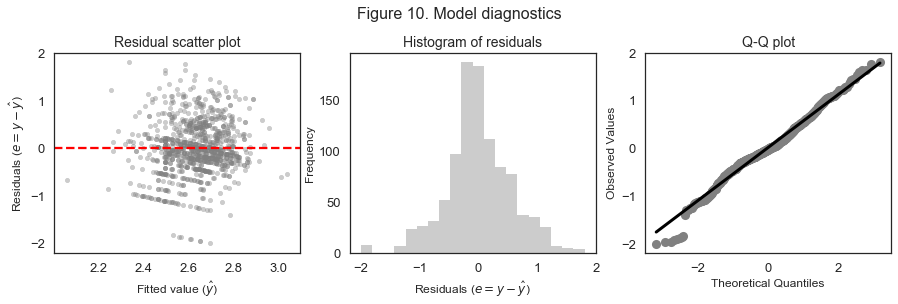

In [20]:
# 
# Test data diagnostics
#

# Calculate errors
pred = res.predict(X_test)
errors = y_test - pred

sample = np.random.randint(len(pred), size=1000)
pred = pred[sample]
errors = errors[sample]

# Predicted vs observed data
df = pd.DataFrame(y_test[sample])
df['pred'] = pred
df.columns = ['observed', 'pred']

# Residual plots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].scatter(pred, errors, color='grey', alpha=0.4, s=20)
ax[0].axhline(y=0, color='red', label='zero error', linestyle='dashed')
ax[0].set_title('Residual scatter plot', fontsize=14)
ax[0].set_xlabel('Fitted value ($\hat{y}$)', fontsize=12)
ax[0].set_ylabel('Residuals ($e = y - \hat{y}$)', fontsize=12);

ax[1].hist(errors, color='grey', bins=20, alpha=0.4);
ax[1].set_title('Histogram of residuals', fontsize=14)
ax[1].set_xlabel('Residuals ($e = y - \hat{y}$)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12);

stats.probplot(errors, plot=ax[2]);
ax[2].get_lines()[0].set_markerfacecolor('grey')
ax[2].get_lines()[1].set_color('black')
ax[2].get_lines()[1].set_linewidth(3)
ax[2].set_title('Q-Q plot', fontsize=14);
ax[2].set_xlabel('Theoretical Quantiles', fontsize=12)
ax[2].set_ylabel('Observed Values', fontsize=12);

plt.suptitle("Figure 10. Model diagnostics", fontsize=16);
plt.subplots_adjust(top=0.82);

plt.savefig("output/modelD_diagnostics_test.png", bbox_inches='tight')

## Logistic Regression

In the next section we consider a different question using Logistic Regression. Rather than modeling the inspection score, we investigate whether the Yelp review rating can be predicted using the demographics and inspections data, including specific violation codes recorded for each inspection that were not considered in the previous analysis. These violation codes were not considered in the previous analysis because they are highly interrelated with the previous response (inspection score); the inspection score is effectively partly a function of the violations incurred by a restaurant during the inspection.

Yelp users submit ratings for a restaurant with discrete values between 1 and 5, with 1 being a poor review and 5 being great. Through the Yelp API, we were able to obtain the average of these user-submitted reviews. We are principally interested in understanding if there is an association between inspection scores and whether a restaurant has a very poor average Yelp rating. We therefore consider a binary class based on the average Yelp ratings, with an average below 3 deemed to be poor and ratings of 3 and higher deemed to be average or good. The charts below show the number of observations for both the raw rating and the binary class based on the ratings.

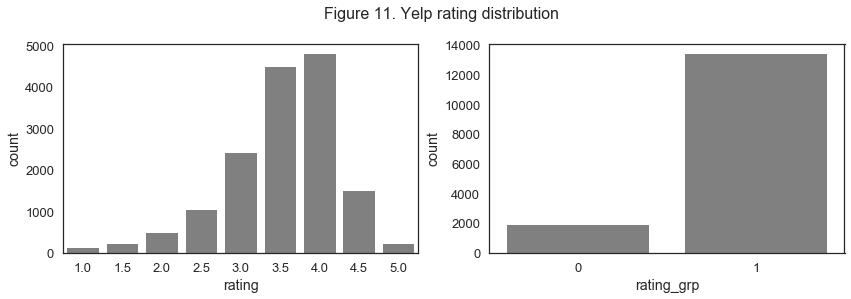

In [21]:
#
# Data prep
#

def rating_group(row):
    if row < 3:
        label = 0
    else:
        label = 1
    return label

# Creating 'rating group' response
data['rating_grp'] = data['rating'].apply(rating_group)

# Plot number of observations in each group
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.countplot(data['rating'], color='grey', ax=ax[0]);
sns.countplot(data['rating_grp'], color='grey', ax=ax[1]);

plt.suptitle("Figure 11. Yelp rating distribution", fontsize=16);
plt.subplots_adjust(top=0.85);

plt.savefig("output/classification_classes.png", bbox_inches='tight')

In [22]:
# Data prep

col = 'grade'
data[col].fillna('missing', inplace=True)
df = pd.get_dummies(data[col], prefix=col)
data = data.join(df)
data.drop(col, axis=1, inplace=True)

In [23]:
# Selected predictors + response
model_cols = ['log_review_count', 'price', 'log_score', 'sqrt_score_avg', 'rating_grp']

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

# Fit model
clf = LogisticRegressionCV(Cs=10, cv=10, n_jobs=4, verbose=0)
clf.fit(X_train, y_train)

# Train accuracy
acc = clf.score(X_train, y_train)

### Predicting Yelp rating using inspection scores

We again use Lasso regression for feature selection to identify the most significant predictors. This provides a more parsimonious model with reduced multi-collinearity, making it easier to interpret the model results. The table below shows the variables whose coefficients are significantly different from zero at the 5% significance level based on the bootstrapped confidence intervals.

We make the following observations based on the mean coefficicient for each predictor:
* Restaurants with a larger number of Yelp reviews (`log_review_count`) are less likely to have a poor rating (less than 3).
* Restaurants that have been identified as chains (`restaurant_name_chain`) are more likely to have a poor rating 
* Wine bars, pubs and Italian restaurants have relatively better ratings compared to Chinese and "Chicken Wing" restaurants
* Violation code 4D (food worker not washing hands after using toilet, coughing or sneezing) also appears to have an association with the average Yelp rating, with restaurants being more likely to have a poor rating if this violation code has been recorded

In [24]:
#
# Data prep
#

# All possible predictors
first_index = data.columns.get_loc("review_count")
last_index = data.columns.get_loc("grade_missing")
model_cols = list(data.columns[first_index: last_index + 1])

# Exclude perfectly collinear predictors 
exclude_vars = ['rating', 'rating_grp', 'review_count', 'score', 'log_score']
for c in exclude_vars:
    model_cols.remove(c)

# Response
model_cols.append('rating_grp')

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

# Scale predictors
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

In [25]:
# Fit model
n, p = X_train.shape
coef = np.empty((nsims, p))

for i in range(nsims):
    
    # Bootstrap 
    sample = np.random.randint(0, n, n)
    X_train_boot = X_train[sample]
    y_train_boot = y_train[sample]    
    
    # Fit model
    clf = LogisticRegression(C=0.05, penalty='l1', solver='liblinear', verbose=0, max_iter=100)
    clf.fit(X_train_boot, y_train_boot);
    
    # Coefficients
    coef[i,:] = clf.coef_

In [26]:
alpha = 0.025
coef_boot = pd.DataFrame(coef)

# Get empirical lower and upper bounds
LB = coef_boot.quantile(alpha)
UB = coef_boot.quantile(1-alpha)

C = np.logical_and(LB <= np.zeros(p), np.zeros(p) <= UB)
#print("Number of significant coefficients:", str(np.sum(1 - C)))

# Get mean estimate
coef_mean = coef_boot.mean().to_frame()
coef_mean['LB'] = LB
coef_mean['UB'] = UB

coef_mean['name'] = model_cols[:-1]
coef_mean = coef_mean.loc[np.logical_not(C),:]

# Format
coef_mean.columns = ['coef', 'LB', 'UB', 'name']
coef_mean.index = coef_mean['name']
coef_mean.drop('name', axis=1, inplace=True)
print(coef_mean.round(3))

                                 coef     LB     UB
name                                               
trans_restaurant_reservation    0.259  0.153  0.385
cat_tradamerican               -0.125 -0.197 -0.040
cat_vegetarian                  0.102  0.026  0.169
cat_bars                        0.095  0.005  0.199
cat_chinese                    -0.143 -0.207 -0.070
cat_chicken_wings              -0.208 -0.272 -0.142
cat_sandwiches                  0.089  0.008  0.179
cat_bubbletea                   0.154  0.113  0.190
cat_lounges                    -0.109 -0.189 -0.021
cat_burgers                    -0.155 -0.223 -0.086
cat_diners                     -0.110 -0.177 -0.041
cat_wine_bars                   0.171  0.127  0.218
cat_pubs                        0.159  0.075  0.258
cat_korean                      0.087  0.003  0.190
cat_italian                     0.108  0.025  0.207
violation_04d                  -0.075 -0.124 -0.007
restaurant_name_count          -0.246 -0.349 -0.145
restaurant_n

In [27]:
# Re-fit model

# Predictors 
model_cols = list(coef_mean.index)

# Response
model_cols.append('rating_grp')

# Create train and test sets
train_df, test_df = train_test_split(data[model_cols], test_size=0.5, random_state=87)

# Model predictors
X_train = train_df.iloc[:,:-1].values
X_test = test_df.iloc[:,:-1].values

# Scale predictors
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Response
y_train = train_df.iloc[:,-1].values
y_test = test_df.iloc[:,-1].values

clf = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', verbose=0, max_iter=100)
clf.fit(X_train, y_train);

The Receiver Operating Characteristic (ROC) curve provides an indication of the accuracy of the classification model. It shows the relationship between the True Positive Rate (proportion of `class 1` restaurants identified correctly) and the False Positive Rate (proportion of `class 0` restuarants predicted to be `class 1`). A perfect model has a True Positive Rate (TPR) of 1 and a False Positive Rate (FPR) of 0. The area under the curve (AUC) is a measure of predictive performance. 

From the ROC chart below, created by assessing the accuracy of a fit model on a reserved test dataset consisting of 50% of our data, we note that the Logistic Regression model is reasonably effective at identifying restaurants with a poor rating (`class 0`) based on the inspection data and other attributes of the restaurant. The model correctly classifies 90% of observations included in the test dataset.

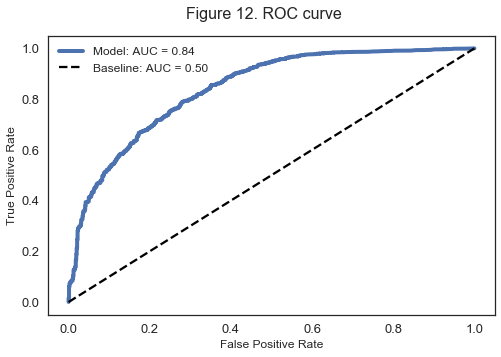

In [28]:
# ROC plot

probs_test = clf.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs_test, pos_label=1)
fpr_0, tpr_0, threshold_0 = roc_curve(y_test, np.ones(len(y_test)), pos_label=1)

auc = roc_auc_score(y_test, probs_test)
auc0 = roc_auc_score(y_test, np.ones(len(y_test)))

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.plot(fpr, tpr, label = 'Model: AUC = %0.2f' % auc, linewidth=4)
plt.plot(fpr_0, tpr_0, 'k--', label = 'Baseline: AUC = %0.2f' % auc0)

#plt.title('Receiver Operating Characteristic', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

plt.suptitle("Figure 12. ROC curve", fontsize=16);
plt.subplots_adjust(top=0.90);

plt.savefig("output/modelE_ROC.png", bbox_inches='tight')

In [29]:
test_accuracy = clf.score(X_test, y_test)

## Conclusions

Results of this study confirm that there is an association between restaurant review data from Yelp, demographics data, and the inspection results for restaurants inspected by the NYC Health Department. However, the association is not as strong as we initially expected.

Regarding the first question we set out to analyze, whether Yelp and demographics data could help us predict inspection results, our final model incorporating the lasso-derived predictor set only accounted for roughly 5% of the variation in the inspection scores. Although this is quite low, we were still able to uncover some statistically significant predictors and corresponding implications. First, certain restaurant categories (e.g., Latin, Indian/Pakistani, New American and Deli's) are expected, on average, to have higher (worse) inspection scores; we did not find any categories that are expected to have lower (better) inspection scores whose effect was statistically significant. Second, the average of a restaurant's prior inspection scores do have a statistically significant association with their next score, but the magnitude of this association is small (less than 10%), suggesting that the health standards of restaurants do change from one inspection to the next. Third, restaurants that have not been inspected for a longer period of time are likely to receive a better score. This would make sense if inspectors visit problematic restaurants more frequently. Lastly, we note that restaurants that are part of a chain are expected to have better scores. The authors postulate that this might be explained by restaurant franchises placing higher priority on health code compliance given potential reputational risk and having access to greater resources.

As for our second research question, whether inspection results and demographics data can be used to predict whether a restaurant has a favorable Yelp rating (defined as an average rating of 3 or higher), we were able to correctly classify 90% of observations. However, because our distribution of 0/1s in our classification were very skewed, with significantly more 1s than 0s, a more "fair" performance metric is the area under the curve (AUC) metric because it takes into account performance as it relates to both the true positive rate and false positive rate; else, we could have simply designed a model that always predicted a favorable Yelp review (a 1) and achieved near-90% accuracy. The implications surrounding the predictors were just as interesting as those uncovered pursuing our first research question. First, restaurants with a larger number of Yelp reviews are more likely to have a favorable Yelp rating. Second, restaurant chains are more likely to have an unfavorable rating. Third, wine bars, pubs and Italian restaurants generally enjoy more favorable ratings compared to Chinese and "Chicken Wing" restaurants. Lastly, violation code 4D (food worker not washing hands after using toilet, coughing or sneezing) also appears to have an association with the average Yelp rating, with restaurants being more likely to have an unfavorable rating if this violation code has been recorded.

This study finds supportive evidence that municipalities may potentially be able to build models with publicly available datasets that could help them more effectively channel funds and personnel in the variety of assessments they conduct. Although the models explored in this study by themselves do not account for a sufficient degree of variation to be implemented in a useful manner, they have demonstrated that features do exist that are associated with inspection scores in a statistically significant manner. The authors believe this has been demonstrated enough to warrant further research in this manner.

This study also confirms that consumers do care about the kinds of health code violations incurred by restaurants, as evidenced by the association between violation code 4D and unfavorable Yelp ratings. Although the authors doubt consumers follow the specific violation codes closely, we postulate that incurring a violation of code 4D is likely reflective of other restaurant characteristics that consumers do not care for and penalize restaurants for in their Yelp ratings.

One unknown that may have significant implications for future work is the content of written Yelp reviews. Although we had access to the overall ratings, there may be more useful information provided in the summaries provided by restaurant-goers of their experience in the restaurant. At the time of this study, the Yelp API only supported retrieving three user-submitted reviews for a restaurant, not enough to conduct a meaningful text analysis for potential keywords.

## Appendix


"OLS Regression Results" tables are provided by the `statsmodels` package in Python.

#### Table 1: OLS with Yelp review variables

In [30]:
display(appdx_1_mod1summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.21
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           5.74e-08
Time:                        13:34:49   Log-Likelihood:                -6315.9
No. Observations:                7625   AIC:                         1.264e+04
Df Residuals:                    7621   BIC:                         1.267e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6500      0.036     73.212      0.000       2.579       2.721
log_review_count     0.0225      0.005      4.982      0.000       0.014       0.031
rating              -0.0356      0.009     -3.827      0.000      -0.054      -0.017
price                0.0085      0.011      0.771      0.441      -0.013       0.030
==============================================================================
Omnibus:                      262.104   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              530.991
Skew:                          -0.240   Prob(JB):                    4.98e-116
Kurtosis:                       4.200   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Table 2: OLS with inspection score variables

In [31]:
display(appdx_2_mod2summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     65.45
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           8.86e-42
Time:                        13:34:51   Log-Likelihood:                -6237.2
No. Observations:                7625   AIC:                         1.248e+04
Df Residuals:                    7621   BIC:                         1.251e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4213      0.035     68.642      0.000       2.352       2.490
sqrt_score_avg            0.0691      0.008      8.364      0.000       0.053       0.085
time_since_prev          -0.0523      0.017     -3.151      0.002      -0.085      -0.020
restaurant_name_chain    -0.1695      0.022     -7.616      0.000      -0.213      -0.126
==============================================================================
Omnibus:                      326.113   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.064
Skew:                          -0.293   Prob(JB):                    4.73e-149
Kurtosis:                       4.344   Cond. No.                         23.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Table 3: OLS with restaurant category variables

In [32]:
display(appdx_3_mod3summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.446
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           2.25e-43
Time:                        13:34:53   Log-Likelihood:                -6162.8
No. Observations:                7625   AIC:                         1.244e+04
Df Residuals:                    7570   BIC:                         1.282e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.5710      0.060     42.674      0.000       2.453       2.689
log_review_count          0.0133      0.005      2.735      0.006       0.004       0.023
rating                   -0.0585      0.011     -5.574      0.000      -0.079      -0.038
price                     0.0031      0.013      0.245      0.807      -0.022       0.028
sqrt_score_avg            0.0565      0.008      6.773      0.000       0.040       0.073
time_since_prev          -0.0438      0.017     -2.636      0.008      -0.076      -0.011
restaurant_name_chain    -0.2065      0.035     -5.970      0.000      -0.274      -0.139
cat_asianfusion           0.0872      0.048      1.825      0.068      -0.006       0.181
cat_bagels                0.0560      0.052      1.082      0.279      -0.045       0.157
cat_bakeries             -0.0048      0.029     -0.164      0.870      -0.062       0.052
cat_bars                 -0.0117      0.030     -0.387      0.699      -0.071       0.048
cat_bbq                   0.0448      0.060      0.750      0.454      -0.072       0.162
cat_breakfast_brunch     -0.0040      0.026     -0.152      0.879      -0.055       0.047
cat_bubbletea             0.0594      0.060      0.985      0.325      -0.059       0.178
cat_burgers               0.0370      0.031      1.185      0.236      -0.024       0.098
cat_cafes                -0.0184      0.036     -0.504      0.614      -0.090       0.053
cat_caribbean             0.0792      0.053      1.497      0.135      -0.025       0.183
cat_chicken_wings         0.0547      0.046      1.185      0.236      -0.036       0.145
cat_chinese               0.0845      0.030      2.864      0.004       0.027       0.142
cat_cocktailbars         -0.0157      0.040     -0.390      0.697      -0.095       0.063
cat_coffee               -0.0539      0.025     -2.146      0.032      -0.103      -0.005
cat_delis                 0.1315      0.044      3.018      0.003       0.046       0.217
cat_desserts             -0.0634      0.038     -1.686      0.092      -0.137       0.010
cat_diners                0.0311      0.039      0.798      0.425      -0.045       0.108
cat_french                0.0403      0.049      0.820      0.412      -0.056       0.137
cat_greek                -0.0388      0.069     -0.565      0.572      -0.173       0.096
cat_hotdogs              -0.0008      0.040     -0.020      0.984      -0.079       0.077
cat_icecream              0.0515      0.057      0.897      0.370      -0.061       0.164
cat_indpak                0.1385      0.041      3.350      0.001       0.057       0.220
cat_italian               0.0278      0.026      1.076      0.282      -0.023       0.078
cat_japanese              0.0196      0.039      0.496      0.620      -0.058       0.097
cat_juicebars          

#### Table 4: OLS with lasso-selected features

In [33]:
display(appdx_4_mod4summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     29.83
Date:                Fri, 08 Dec 2017   Prob (F-statistic):           7.61e-73
Time:                        13:47:12   Log-Likelihood:                -6144.7
No. Observations:                7625   AIC:                         1.232e+04
Df Residuals:                    7611   BIC:                         1.241e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.6337      0.053     50.101      0.000       2.531       2.737
rating                   -0.0588      0.010     -5.887      0.000      -0.078      -0.039
cat_latin                 0.1157      0.039      2.933      0.003       0.038       0.193
cat_mexican               0.0707      0.029      2.428      0.015       0.014       0.128
cat_indpak                0.1200      0.040      3.029      0.002       0.042       0.198
cat_newamerican           0.0808      0.027      2.948      0.003       0.027       0.135
cat_delis                 0.1114      0.042      2.649      0.008       0.029       0.194
cat_korean                0.1497      0.049      3.038      0.002       0.053       0.246
restaurant_name_chain    -0.2145      0.025     -8.585      0.000      -0.264      -0.166
score_std                -0.0066      0.001     -4.442      0.000      -0.009      -0.004
time_since_prev          -0.0601      0.017     -3.620      0.000      -0.093      -0.028
first_inspection         -0.1342      0.024     -5.529      0.000      -0.182      -0.087
sqrt_score_avg            0.1325      0.012     11.368      0.000       0.110       0.155
sqrt_score_prev          -0.0520      0.007     -7.346      0.000      -0.066      -0.038
==============================================================================
Omnibus:                      270.954   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.793
Skew:                          -0.224   Prob(JB):                    1.40e-128
Kurtosis:                       4.286   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## References

Chatterjee, Samprit, and Ali Hadi S. *Regression Analysis by Example.* 5th ed. Wiley, 2012.

Faraway, Julian J. *Linear Models with R*. 2nd ed. CRC Press. 2014.

Ingersoll, Grant S., Thomas S. Morton, and Andrew L. Farris. *Taming Text: How to Find, Organise, and Manipulate It.* Shelter Island, NY: Manning, 2013.